In [211]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy
import numpy as np  
%matplotlib inline

In [212]:
arc = pd.read_excel(r"C:\Users\Volod\Documents\сёма хак\Data_SberIndex_POAD.xlsx", sheet_name="Данные")

In [268]:
salary = pd.read_csv(r"C:\Users\Volod\Documents\сёма хак\sber_index_data\sber_index_data\4_bdmo_salary.csv", encoding="utf-8", sep=",")
total_by_territory = salary[salary['okved_name'] == 'Все отрасли'].copy()

total_by_territory = total_by_territory[['territory_id', 'value']]

total_by_territory = total_by_territory.rename(columns={'value': 'total_value'})
mn = total_by_territory['total_value'].mean()

In [252]:
ids = pd.read_csv(r"C:\Users\Volod\Documents\сёма хак\territory_id_pora\territory_id_pora.csv", encoding="windows-1251", sep=";")

In [214]:
a = ["пгт Уренгой", "рабочий поселок Искателей", "пгт Харп", "село Карпогоры", "пгт Сафоново", "поселок Уемский", "село Красноселькуп", "село Туруханск", "пгт Березово", "пгт Северный", "пгт Лоухи", "пгт Воргашор", "посёлок Катунино", "село Яр-Сале", "село Лешуконское", "пгт Калевала", "рп Малошуйка", "пгт Угольные Копи", "село Усть-Цильма", "пгт Надвоицы", "пгт Пангоды", "пгт Мурмаши", "село Мужи", "село Гыда", "село Хатанга", "пгт Зырянка", "пгт Беринговский", "пгт Умба", "поселок Тура", "пгт Молочный", "пгт Никель", "населенный пункт Видяево", "пгт Печенга", "пгт Ревда", "село Алакуртти", "пгт Зеленоборский", "пгт Кильдинстрой", "пгт Игрим", "поселок Тазовский", "село Аксарка", "пгт Провидения", "поселок Ханымей", "пгт Верхнетуломский", "пгт Заполярный", "пгт Эгвекинот", "пгт Депутатский"]

In [260]:
matches_dict = {}

for item in a:
    match = ids[ids["settlement_name"] == item]
    if not match.empty:
        key = match.iloc[0]["territory_id"]  
        matches_dict[item] = key
    else:
        matches_dict[item] = None
keys_array = list(matches_dict.values())
matches_dict 


{'пгт Уренгой': np.int64(2882),
 'рабочий поселок Искателей': np.int64(917),
 'пгт Харп': np.int64(2880),
 'село Карпогоры': np.int64(910),
 'пгт Сафоново': np.int64(1517),
 'поселок Уемский': np.int64(912),
 'село Красноселькуп': np.int64(2244),
 'село Туруханск': np.int64(720),
 'пгт Березово': np.int64(686),
 'пгт Северный': np.int64(225),
 'пгт Лоухи': np.int64(213),
 'пгт Воргашор': np.int64(225),
 'посёлок Катунино': np.int64(912),
 'село Яр-Сале': np.int64(2250),
 'село Лешуконское': np.int64(906),
 'пгт Калевала': np.int64(209),
 'рп Малошуйка': np.int64(909),
 'пгт Угольные Копи': np.int64(2348),
 'село Усть-Цильма': np.int64(243),
 'пгт Надвоицы': np.int64(221),
 'пгт Пангоды': np.int64(2245),
 'пгт Мурмаши': np.int64(1519),
 'село Мужи': np.int64(2249),
 'село Гыда': np.int64(2248),
 'село Хатанга': np.int64(718),
 'пгт Зырянка': np.int64(318),
 'пгт Беринговский': np.int64(2348),
 'пгт Умба': np.int64(1522),
 'поселок Тура': np.int64(726),
 'пгт Молочный': np.int64(1519),
 

In [274]:
salary_table = pd.DataFrame([
    {'mun_name': name, 'territory_id': id_value} 
    for name, id_value in matches_dict.items()
])

salary_table = salary_table.drop_duplicates(subset=['territory_id'], keep='first')

salary_table['wage_average'] = np.nan

salary_table = salary_table.sort_values('territory_id').reset_index(drop=True)

territory_values = salary.groupby('territory_id')['value'].mean().reset_index()

new_table_with_values = pd.merge(
    salary_table[['territory_id', 'mun_name']],
    territory_values,
    on='territory_id',
    how='left'
)
new_table_with_values = new_table_with_values.rename(columns={'value': 'wage_average'})
new_table_with_values = new_table_with_values.rename(columns={'mun_name': 'settlement_name'})


new_table_with_values

,territory_id,settlement_name,wage_average
0,209,пгт Калевала,61386.382432
1,213,пгт Лоухи,86532.373333
2,221,пгт Надвоицы,58224.658667
3,225,пгт Северный,103342.615323
4,243,село Усть-Цильма,58293.268831
5,318,пгт Зырянка,95420.376000
6,341,пгт Депутатский,106960.455357
7,686,пгт Березово,61870.905714
8,718,село Хатанга,119321.849351
9,720,село Туруханск,102570.784615


In [216]:
new_arc = arc[arc['settlement_name'].isin(a)].copy()
new_arc

,region,municipality_up_name,municipality_down_name,settlement_name,settlement_name_sep,type,arctic,remote,special,suburb,...,nomadic_support,nomadic_firms,2.1.2_healthcare_new,2.1.3_housing_new,2.1.4_sports_new,2.1.7_public_spaces_new,2.1.8_education_new,2.2.1_air_quality_new,2.3.5_suitability_indigenous_binary_new,2.7_crime_experience_binary_new
0,Ямало-Ненецкий автономный округ,Муниципальный округ Пуровский район,Муниципальный округ Пуровский район,пгт Уренгой,пгт Уренгой (Ямало-Ненецкий автономный округ),пгт,1.0,0.0,0,0.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ненецкий автономный округ,Заполярный муниципальный район,Городское поселение рабочий поселок Искателей,рабочий поселок Искателей,рабочий поселок Искателей (Ненецкий автономный...,рп,1.0,0.0,0,1.0,...,0.000000,0.000000,3.800000,3.700000,3.600000,3.700000,3.800000,3.257143,0.942857,0.228571
3,Ямало-Ненецкий автономный округ,Городской округ город Лабытнанги,Городской округ город Лабытнанги,пгт Харп,пгт Харп (Ямало-Ненецкий автономный округ),пгт,1.0,0.0,0,1.0,...,NaN,NaN,2.142857,2.464286,3.035714,2.892857,3.392857,3.785714,0.821429,0.428571
4,Архангельская область,Пинежский муниципальный район,Карпогорское сельское поселение,село Карпогоры,село Карпогоры (Архангельская область),село,1.0,0.0,ОНП,0.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Мурманская область,Городской округ город Североморск (ЗАТО),Городской округ город Североморск (ЗАТО),пгт Сафоново,пгт Сафоново (Мурманская область),пгт,1.0,0.0,0,1.0,...,0.000000,0.000000,3.090909,2.522727,2.568182,2.431818,3.409091,3.454545,0.840909,0.295455
7,Архангельская область,Приморский муниципальный район,Уемское сельское поселение,поселок Уемский,поселок Уемский (Архангельская область),поселок,1.0,0.0,ПНП,1.0,...,0.000000,0.000000,2.063830,1.957447,2.574468,2.148936,2.680851,2.914894,0.787234,0.510638
8,Ямало-Ненецкий автономный округ,Муниципальный округ Красноселькупский район,Муниципальный округ Красноселькупский район,село Красноселькуп,село Красноселькуп (Ямало-Ненецкий автономный ...,село,1.0,1.0,0,0.0,...,282.822011,0.669882,2.000000,2.102564,2.153846,1.820513,3.128205,2.461538,0.692308,0.153846
10,Красноярский край,Туруханский муниципальный район,Сельское поселение Туруханский сельсовет,село Туруханск,село Туруханск (Красноярский край),село,1.0,0.0,ОНП,0.0,...,38.130000,3.720000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Ханты-Мансийский автономный округ - Югра,Березовский муниципальный район,Городское поселение Березово,пгт Березово,пгт Березово (Ханты-Мансийский автономный окру...,пгт,1.0,0.0,0,0.0,...,63.385042,0.701919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Республика Коми,Городской округ Воркута,Городской округ Воркута,пгт Северный,пгт Северный (Республика Коми),пгт,1.0,1.0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
mig = pd.read_csv(r"C:\Users\Volod\Documents\сёма хак\rosstat\rosstat\3_bdmo_migration.csv", encoding="utf-8", sep=",")

In [218]:
id_to_name = dict(zip(ids['territory_id'], ids['settlement_name']))

filtered_mig = mig[(mig['territory_id'].isin(keys_array)) & (mig['age'] == 'Всего')].copy()

filtered_mig['settlement_name'] = filtered_mig['territory_id'].map(id_to_name)

new_df = filtered_mig[['settlement_name', 'territory_id', 'age', 'gender', 'value']]

In [219]:
new_df.loc[:, 'value'] = pd.to_numeric(new_df['value'], errors='coerce')
max_index = new_df['value'].idxmax()
max_row = new_df.loc[max_index]
print(max_row)

settlement_name    пгт Сафоново
territory_id               1517
age                       Всего
gender                  Мужчины
value                       731
Name: 20543, dtype: object


In [220]:
min_index = new_df['value'].idxmin()
min_row = new_df.loc[min_index]
print(min_row)

settlement_name    пгт Заполярный
territory_id                 2245
age                         Всего
gender                    Мужчины
value                        -800
Name: 12561, dtype: object


In [282]:
merged_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_table_with_values[['settlement_name', 'wage_average']],
    on='settlement_name',
    how='inner'
)

result_table_m = merged_data_m.set_index('settlement_name')
result_table_m['wage_average'] = pd.to_numeric(result_table_m['wage_average'], errors='coerce')
result_table_m['value'] = pd.to_numeric(result_table_m['value'], errors='coerce')

def hypothesis_wage_m(row):
    if row['wage_average'] < mn and row['value'] < 0:
        return 1   
    elif row['wage_average'] > mn and row['value'] > 0:
        return 1   
    else:
        return 0  
result_table_m['hypothesis_flag'] = result_table_m.apply(hypothesis_wage_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\650979444.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


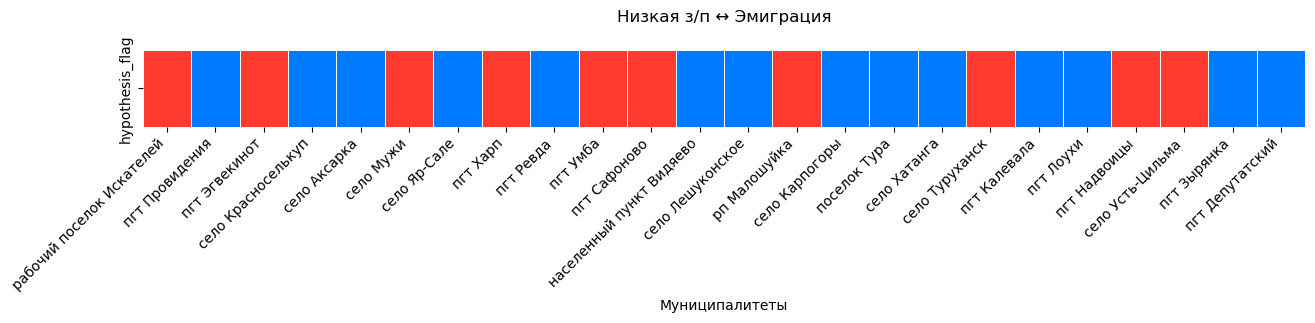

In [283]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    result_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Низкая з/п ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [286]:
merged_data_w = pd.merge(
    new_df[new_df['gender'] == 'Женщины'][['settlement_name', 'value']],
    new_table_with_values[['settlement_name', 'wage_average']],
    on='settlement_name',
    how='inner'
)

result_table_w = merged_data_w.set_index('settlement_name')
result_table_w['wage_average'] = pd.to_numeric(result_table_w['wage_average'], errors='coerce')
result_table_w['value'] = pd.to_numeric(result_table_w['value'], errors='coerce')

def hypothesis_wage_w(row):
    if row['wage_average'] < mn and row['value'] < 0:
        return 1   
    elif row['wage_average'] > mn and row['value'] > 0:
        return 1   
    else:
        return 0
result_table_w['hypothesis_flag'] = result_table_w.apply(hypothesis_wage_m, axis=1)

,value,wage_average,hypothesis_flag
settlement_name,,,
рабочий поселок Искателей,115,113617.708571,1
пгт Провидения,13,126294.061250,1
пгт Эгвекинот,88,130646.462500,1
село Красноселькуп,-40,123527.108621,0
село Аксарка,-31,118646.801515,0
село Мужи,-63,95966.937398,0
село Яр-Сале,-23,140839.970513,0
пгт Харп,149,103543.424667,1
пгт Ревда,160,69978.715493,1


C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\618359412.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


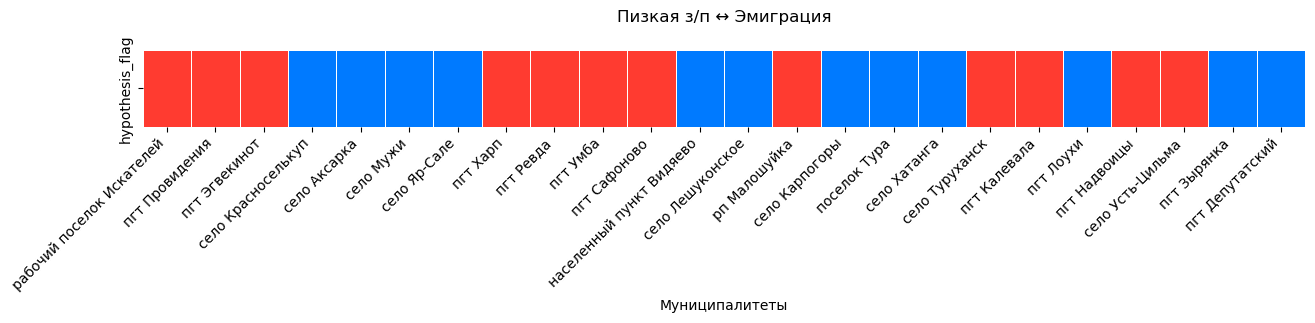

In [285]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    result_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Пизкая з/п ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [225]:
socialka_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'social_share']],
    on='settlement_name',
    how='inner'
)

socialka_table_m = socialka_data_m.set_index('settlement_name')
socialka_table_m = socialka_table_m.dropna()
socialka_table_m['social_share'] = pd.to_numeric(socialka_table_m['social_share'], errors='coerce')
socialka_table_m['value'] = pd.to_numeric(socialka_table_m['value'], errors='coerce')

In [226]:
def hypothesis_socio_m(row):
    if row['social_share'] > socialka_table_m['social_share'].median() and row['value'] < 0:
        return 1   
    elif row['social_share'] < socialka_table_m['social_share'].median() and row['value'] > 0:
        return 1   
    else:
        return 0  
socialka_table_m['hypothesis_flag'] = socialka_table_m.apply(hypothesis_socio_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\1186735970.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


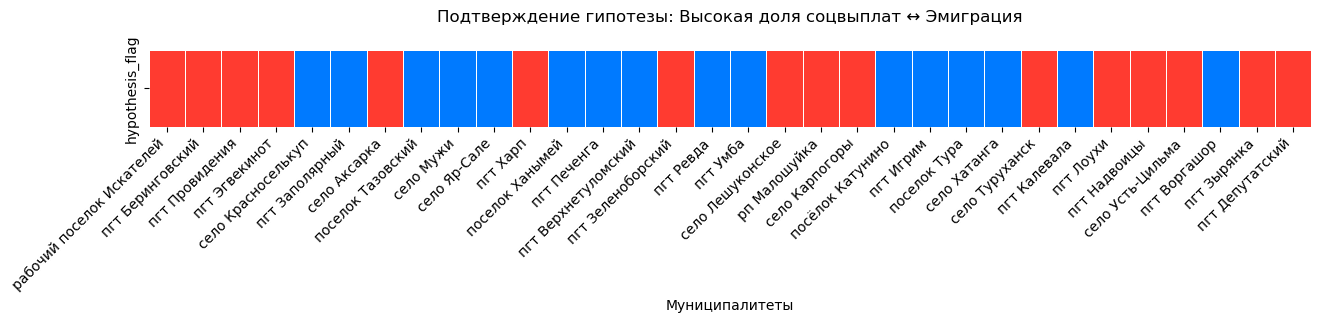

In [227]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    socialka_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Высокая доля соцвыплат ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [228]:
socialka_data_w = pd.merge(
    new_df[new_df['gender'] == 'Женщины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'social_share']],
    on='settlement_name',
    how='inner'
)

socialka_table_w = socialka_data_w.set_index('settlement_name')
socialka_table_w = socialka_table_w.dropna()

socialka_table_w['social_share'] = pd.to_numeric(socialka_table_w['social_share'], errors='coerce')
socialka_table_w['value'] = pd.to_numeric(socialka_table_w['value'], errors='coerce')

def hypothesis_socio_w(row):
    if row['social_share'] > socialka_table_w['social_share'].median() and row['value'] < 0:
        return 1   
    elif row['social_share'] < socialka_table_w['social_share'].median() and row['value'] > 0:
        return 1   
    else:
        return 0   
socialka_table_w['hypothesis_flag'] = socialka_table_w.apply(hypothesis_socio_w, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\1202418860.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


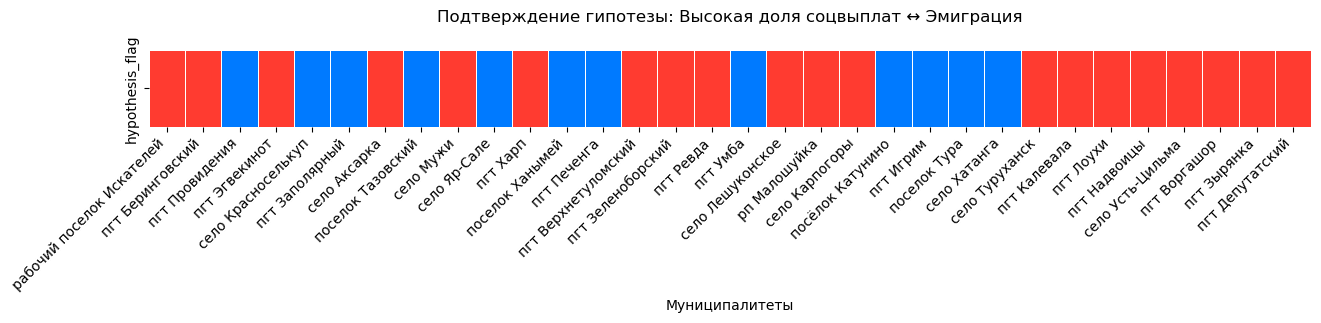

In [229]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    socialka_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],
    cbar=False,
    linewidths=0.5
)
plt.title('Высокая доля соцвыплат ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [230]:
unemp_merg = pd.merge(
    new_arc[['settlement_name', 'unemployed']],
    new_arc[['settlement_name', 'social_share']],
    on='settlement_name',
    how='inner'
)

unemp_merg['social_share'] = pd.to_numeric(unemp_merg['social_share'], errors='coerce')
unemp_merg['unemployed'] = pd.to_numeric(unemp_merg['unemployed'], errors='coerce')

unemp_merg = unemp_merg.dropna()
unemp_merg

,settlement_name,unemployed,social_share
0,пгт Уренгой,10.350727,5.8
1,рабочий поселок Искателей,8.097073,15.5
2,пгт Харп,21.963824,21.6
3,село Карпогоры,10.233059,41.9
5,поселок Уемский,7.010082,26.4
6,село Красноселькуп,2.590211,15.5
8,пгт Березово,16.534082,29.3
9,пгт Северный,6.238616,23.4
11,пгт Воргашор,8.774607,23.4
12,посёлок Катунино,8.562605,26.4


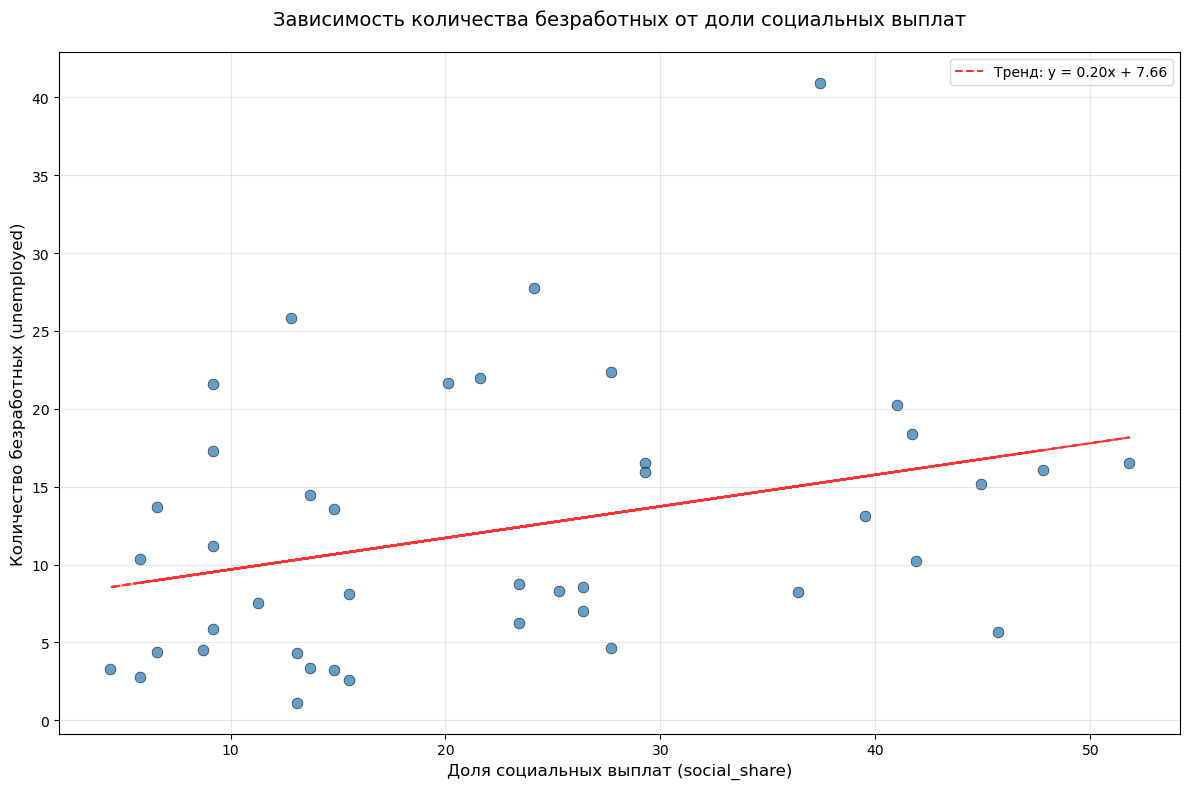

In [231]:
plt.figure(figsize=(12, 8))

plt.scatter(
    unemp_merg['social_share'],
    unemp_merg['unemployed'],
    alpha=0.7,
    s=60, 
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel('Доля социальных выплат (social_share)', fontsize=12)
plt.ylabel('Количество безработных (unemployed)', fontsize=12)
plt.title('Зависимость количества безработных от доли социальных выплат', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)

z = np.polyfit(unemp_merg['social_share'], unemp_merg['unemployed'], 1)
p = np.poly1d(z)
plt.plot(unemp_merg['social_share'], p(unemp_merg['social_share']), "r--", alpha=0.8, 
         label=f'Тренд: y = {z[0]:.2f}x + {z[1]:.2f}')

plt.legend()
plt.tight_layout()
plt.show()
#коэффициент корелляции слабый - 0.32 ну а хуле хотите?

In [232]:
eco_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'emissions_all']],
    on='settlement_name',
    how='inner'
)
eco_table_m = eco_data_m.set_index('settlement_name')
eco_table_m = eco_table_m.dropna()

eco_table_m['emissions_all'] = pd.to_numeric(eco_table_m['emissions_all'], errors='coerce')
eco_table_m['value'] = pd.to_numeric(eco_table_m['value'], errors='coerce')

def hypothesis_eco_m(row):
    if row['emissions_all'] > eco_table_m['emissions_all'].median() and row['value'] < 0:
        return 1   
    elif row['emissions_all'] < eco_table_m['emissions_all'].median() and row['value'] > 0:
        return 1   
    else:
        return 0   
eco_table_m['hypothesis_flag'] = eco_table_m.apply(hypothesis_eco_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\4062960397.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


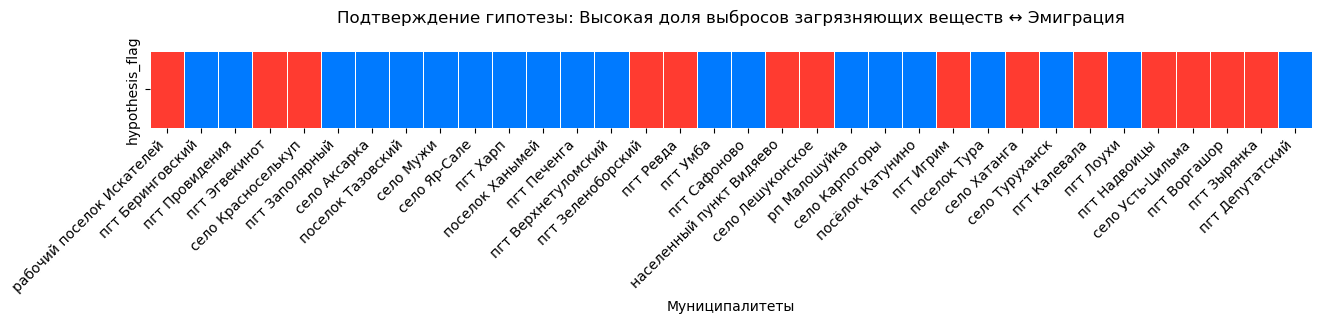

In [233]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    eco_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],
    cbar=False,
    linewidths=0.5
)
plt.title('Подтверждение гипотезы: Высокая доля выбросов загрязняющих веществ ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [234]:
eco_data_w = pd.merge(
    new_df[new_df['gender'] == 'Женщины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'emissions_all']],
    on='settlement_name',
    how='inner'
)
eco_table_w = eco_data_w.set_index('settlement_name')
eco_table_w = eco_table_w.dropna()

eco_table_w['emissions_all'] = pd.to_numeric(eco_table_w['emissions_all'], errors='coerce')
eco_table_w['value'] = pd.to_numeric(eco_table_w['value'], errors='coerce')

def hypothesis_eco_w(row):
    if row['emissions_all'] > eco_table_w['emissions_all'].median() and row['value'] < 0:
        return 1   
    elif row['emissions_all'] < eco_table_w['emissions_all'].median() and row['value'] > 0:
        return 1  
    else:
        return 0   
eco_table_w['hypothesis_flag'] = eco_table_w.apply(hypothesis_eco_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\3471933598.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


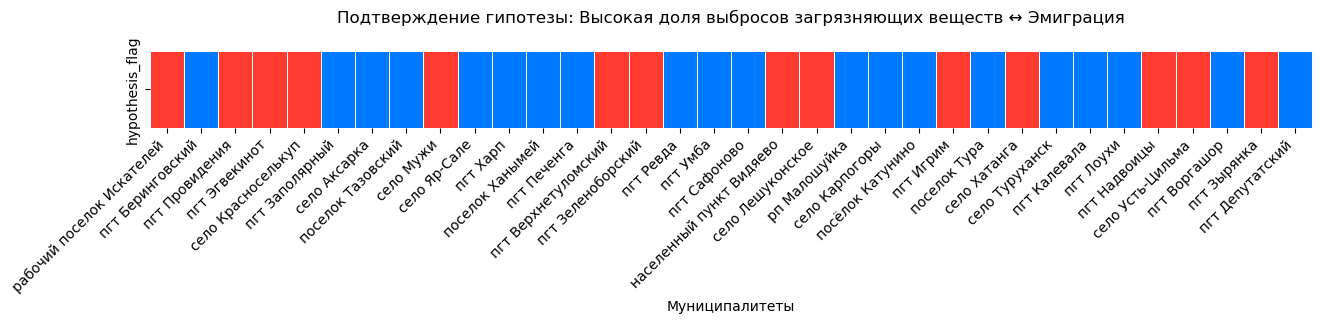

In [235]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    eco_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'], 
    cbar=False,
    linewidths=0.5
)
plt.title('Подтверждение гипотезы: Высокая доля выбросов загрязняющих веществ ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [236]:
zkh_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'families_improve']],
    on='settlement_name',
    how='inner'
)
zkh_table_m = zkh_data_m.set_index('settlement_name')
zkh_table_m = zkh_table_m.dropna()

zkh_table_m['families_improve'] = pd.to_numeric(zkh_table_m['families_improve'], errors='coerce')
zkh_table_m['value'] = pd.to_numeric(zkh_table_m['value'], errors='coerce')

def hypothesis_zkh_m(row):
    if row['families_improve'] > zkh_table_m['families_improve'].median() and row['value'] >= 0:
        return 1   
    elif row['families_improve'] < zkh_table_m['families_improve'].median() and row['value'] < 0:
        return 1   
    else:
        return 0
zkh_table_m['hypothesis_flag'] = zkh_table_m.apply(hypothesis_zkh_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\792684396.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


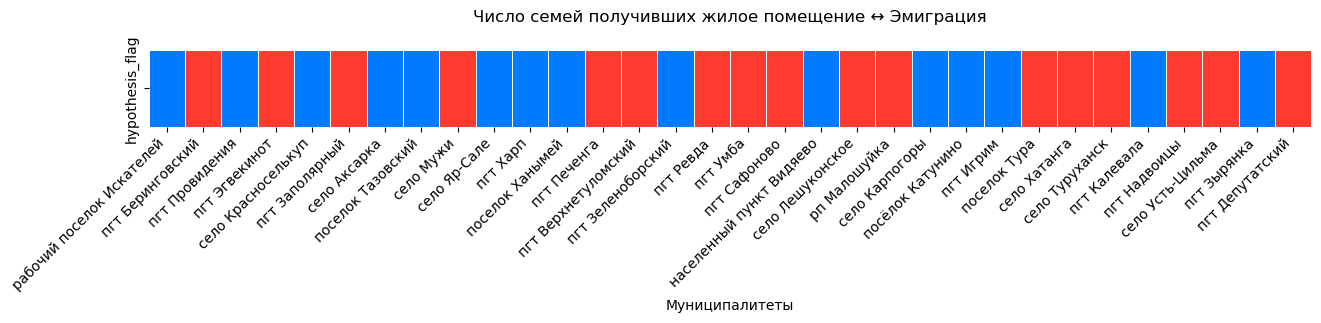

In [237]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    zkh_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Число семей получивших жилое помещение ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [238]:
zkh_data_w = pd.merge(
    new_df[new_df['gender'] == 'Женщины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'families_improve']],
    on='settlement_name',
    how='inner'
)
zkh_table_w = zkh_data_w.set_index('settlement_name')
zkh_table_w = zkh_table_w.dropna()

zkh_table_w['families_improve'] = pd.to_numeric(zkh_table_w['families_improve'], errors='coerce')
zkh_table_w['value'] = pd.to_numeric(zkh_table_w['value'], errors='coerce')

def hypothesis_zkh_w(row):
    if row['families_improve'] > zkh_table_w['families_improve'].median() and row['value'] >= 0:
        return 1   
    elif row['families_improve'] < zkh_table_w['families_improve'].median() and row['value'] < 0:
        return 1  
    else:
        return 0   
zkh_table_w['hypothesis_flag'] = zkh_table_w.apply(hypothesis_zkh_w, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\2469390281.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


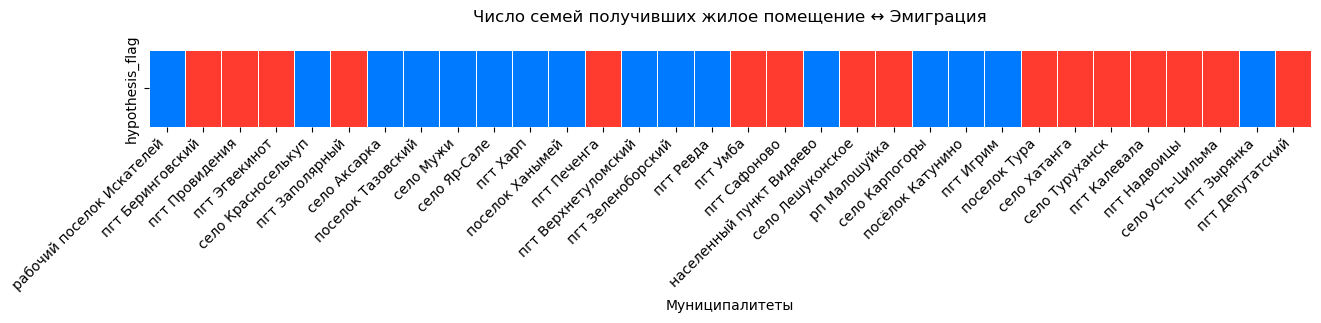

In [239]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    zkh_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Число семей получивших жилое помещение ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [240]:
nab_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'death_rate']],
    on='settlement_name',
    how='inner'
)
nab_table_m = nab_data_m.set_index('settlement_name')
nab_table_m = nab_table_m.dropna()

nab_table_m['death_rate'] = pd.to_numeric(nab_table_m['death_rate'], errors='coerce')
nab_table_m['value'] = pd.to_numeric(nab_table_m['value'], errors='coerce')

def hypothesis_nab_m(row):
    if row['death_rate'] > nab_table_m['death_rate'].median() and row['value'] < 0:
        return 1  
    elif row['death_rate'] < nab_table_m['death_rate'].median() and row['value'] > 0:
        return 1   
    else:
        return 0   
nab_table_m['hypothesis_flag'] = nab_table_m.apply(hypothesis_nab_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\1653775676.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


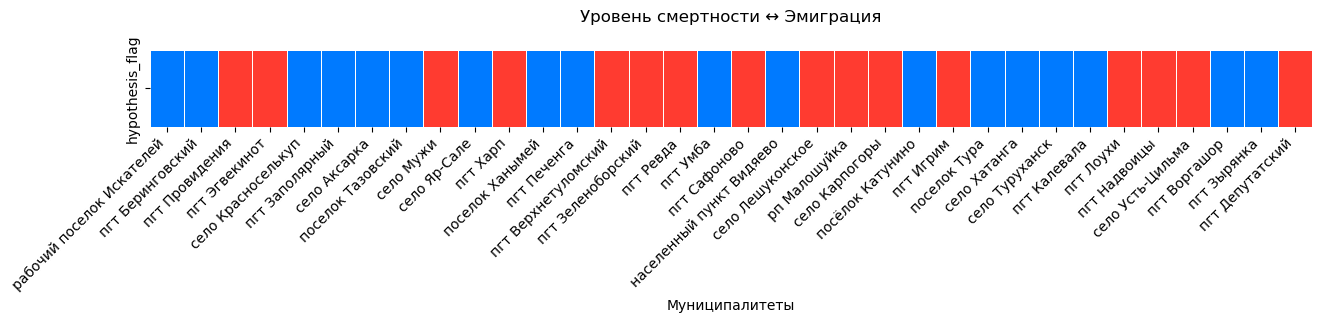

In [241]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    nab_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Уровень смертности ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [242]:
nab_data_w = pd.merge(
    new_df[new_df['gender'] == 'Женщины'][['settlement_name', 'value']],
    new_arc[['settlement_name', 'death_rate']],
    on='settlement_name',
    how='inner'
)
nab_table_w = nab_data_w.set_index('settlement_name')
nab_table_w = nab_table_w.dropna()

nab_table_w['death_rate'] = pd.to_numeric(nab_table_w['death_rate'], errors='coerce')
nab_table_w['value'] = pd.to_numeric(nab_table_w['value'], errors='coerce')

def hypothesis_nab_w(row):
    if row['death_rate'] > nab_table_w['death_rate'].median() and row['value'] < 0:
        return 1  
    elif row['death_rate'] < nab_table_w['death_rate'].median() and row['value'] > 0:
        return 1  
    else:
        return 0  
nab_table_w['hypothesis_flag'] = nab_table_w.apply(hypothesis_nab_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\3818011210.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


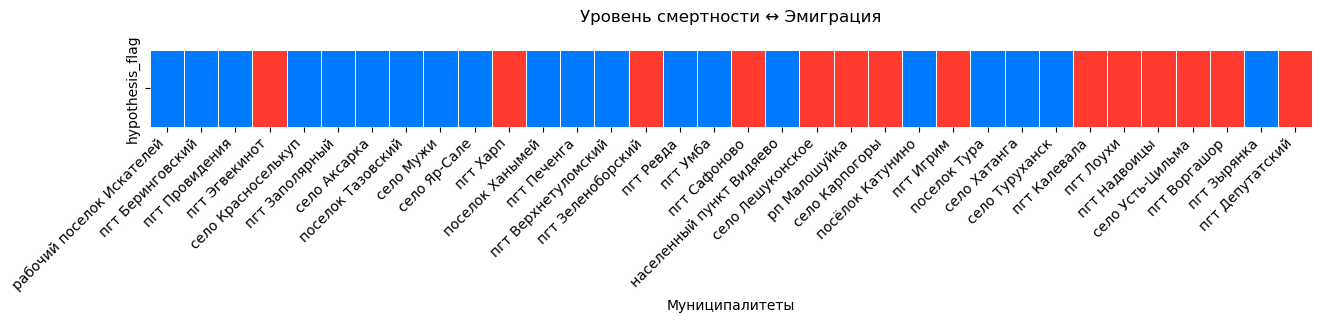

In [243]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    nab_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],
    cbar=False,
    linewidths=0.5
)
plt.title('Уровень смертности ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [244]:
edu_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', '2.1.8_education_new']],
    on='settlement_name',
    how='inner'
)
edu_table_m = edu_data_m.set_index('settlement_name')
edu_table_m = edu_table_m.dropna()

edu_table_m['2.1.8_education_new'] = pd.to_numeric(edu_table_m['2.1.8_education_new'], errors='coerce')
edu_table_m['value'] = pd.to_numeric(edu_table_m['value'], errors='coerce')

def hypothesis_edu_m(row):
    if row['2.1.8_education_new'] < edu_table_m['2.1.8_education_new'].median() and row['value'] <= 0:
        return 1  
    elif row['2.1.8_education_new'] > edu_table_m['2.1.8_education_new'].median() and row['value'] > 0:
        return 1   
    else:
        return 0   
edu_table_m['hypothesis_flag'] = edu_table_m.apply(hypothesis_edu_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\3984605418.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


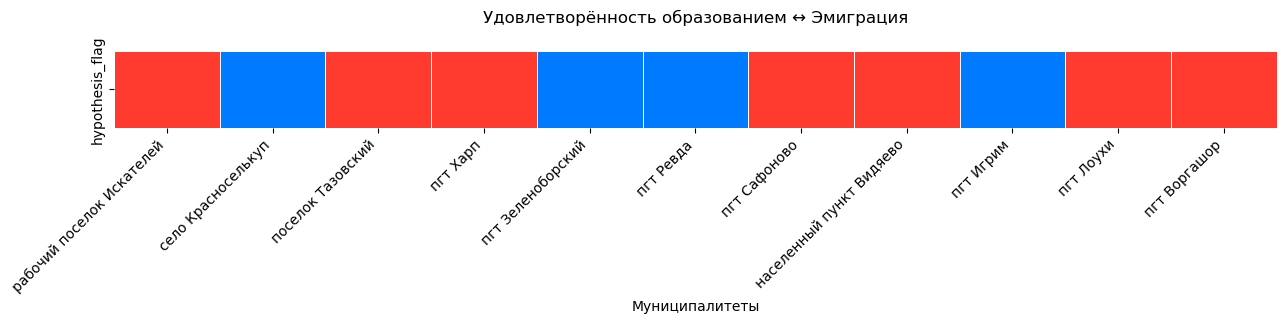

In [245]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    edu_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],
    cbar=False,
    linewidths=0.5
)
plt.title('Удовлетворённость образованием ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [246]:
edu_data_w = pd.merge(
    new_df[new_df['gender'] == 'Женщины'][['settlement_name', 'value']],
    new_arc[['settlement_name', '2.1.8_education_new']],
    on='settlement_name',
    how='inner'
)
edu_table_w = edu_data_w.set_index('settlement_name')
edu_table_w = edu_table_w.dropna()

edu_table_w['2.1.8_education_new'] = pd.to_numeric(edu_table_w['2.1.8_education_new'], errors='coerce')
edu_table_w['value'] = pd.to_numeric(edu_table_w['value'], errors='coerce')

def hypothesis_edu_m(row):
    if row['2.1.8_education_new'] < edu_table_w['2.1.8_education_new'].median() and row['value'] <= 0:
        return 1   
    elif row['2.1.8_education_new'] > edu_table_w['2.1.8_education_new'].median() and row['value'] > 0:
        return 1   
    else:
        return 0   
edu_table_w['hypothesis_flag'] = edu_table_w.apply(hypothesis_edu_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\2258581081.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


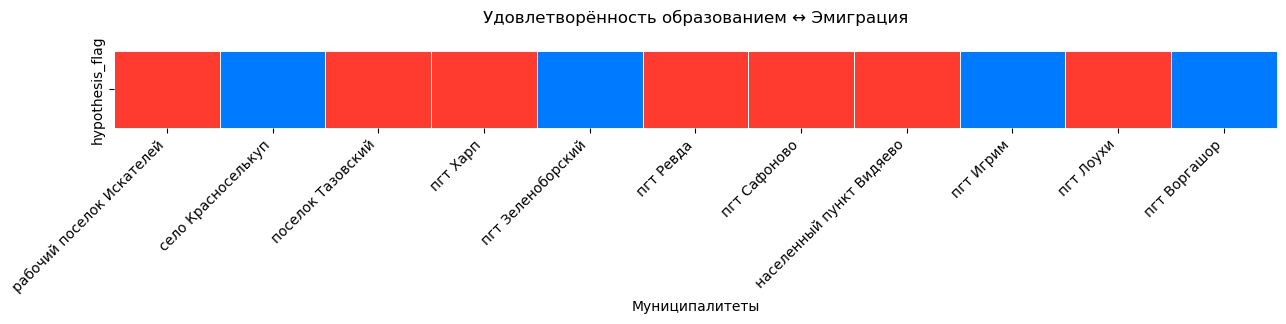

In [247]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    edu_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Удовлетворённость образованием ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [248]:
heal_data_m = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', '2.1.2_healthcare_new']],
    on='settlement_name',
    how='inner'
)
heal_table_m = heal_data_m.set_index('settlement_name')
heal_table_m = heal_table_m.dropna()

heal_table_m['2.1.2_healthcare_new'] = pd.to_numeric(heal_table_m['2.1.2_healthcare_new'], errors='coerce')
heal_table_m['value'] = pd.to_numeric(heal_table_m['value'], errors='coerce')

def hypothesis_heal_m(row):
    if row['2.1.2_healthcare_new'] < heal_table_m['2.1.2_healthcare_new'].median() and row['value'] <= 0:
        return 1   
    elif row['2.1.2_healthcare_new'] > heal_table_m['2.1.2_healthcare_new'].median() and row['value'] > 0:
        return 1   
    else:
        return 0  
heal_table_m['hypothesis_flag'] = heal_table_m.apply(hypothesis_heal_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\3164994688.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


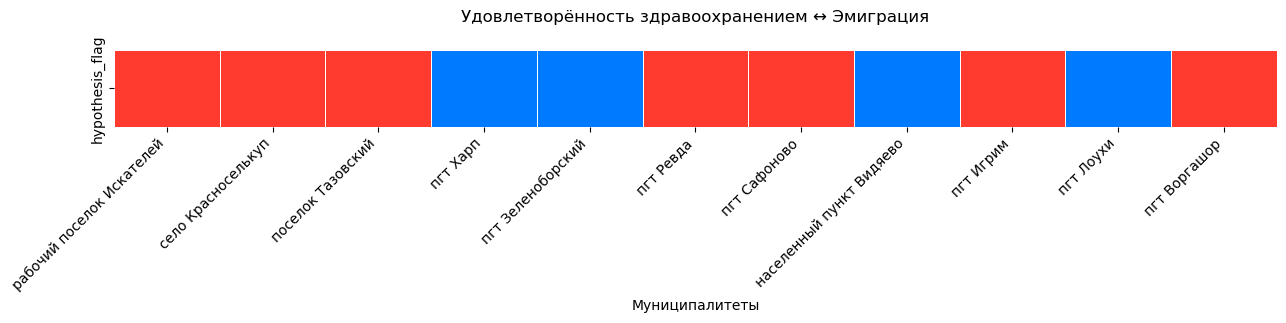

In [249]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    heal_table_m[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'], 
    cbar=False,
    linewidths=0.5
)
plt.title('Удовлетворённость здравоохранением ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [250]:
heal_data_w = pd.merge(
    new_df[new_df['gender'] == 'Мужчины'][['settlement_name', 'value']],
    new_arc[['settlement_name', '2.1.2_healthcare_new']],
    on='settlement_name',
    how='inner'
)
heal_table_w = heal_data_w.set_index('settlement_name')
heal_table_w = heal_table_w.dropna()

heal_table_w['2.1.2_healthcare_new'] = pd.to_numeric(heal_table_w['2.1.2_healthcare_new'], errors='coerce')
heal_table_w['value'] = pd.to_numeric(heal_table_w['value'], errors='coerce')

def hypothesis_heal_m(row):
    if row['2.1.2_healthcare_new'] < heal_table_w['2.1.2_healthcare_new'].median() and row['value'] <= 0:
        return 1   
    elif row['2.1.2_healthcare_new'] > heal_table_w['2.1.2_healthcare_new'].median() and row['value'] > 0:
        return 1   
    else:
        return 0   
heal_table_w['hypothesis_flag'] = heal_table_w.apply(hypothesis_heal_m, axis=1)

C:\Users\Volod\AppData\Local\Temp\ipykernel_20896\2354850736.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


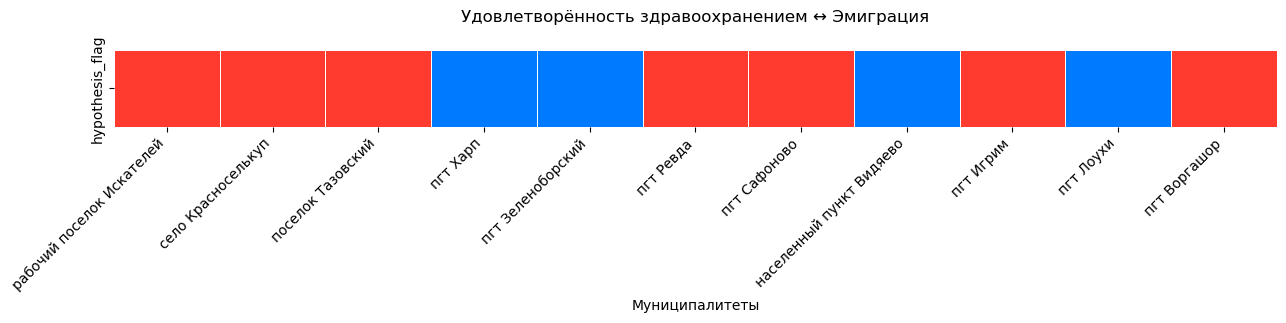

In [251]:
plt.figure(figsize=(15, 1))
sns.heatmap(
    heal_table_w[['hypothesis_flag']].T,
    cmap=['#007AFF', '#FF3B30'],  
    cbar=False,
    linewidths=0.5
)
plt.title('Удовлетворённость здравоохранением ↔ Эмиграция', pad=20)
plt.xlabel('Муниципалитеты')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()